In [1]:
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
t1

[0.04385942283174777]

In [4]:
for _ in range(100):
    t1.append(0.5*t1[-1]+0.1*np.random.normal())

In [5]:
t1

[0.04385942283174777,
 0.024136360704716683,
 -0.09825576848862927,
 -0.0005792221305690737,
 0.014710311014452538,
 -0.04082560969365891,
 0.1814303153108171,
 0.09213390402439661,
 0.10332402905270904,
 0.010485125700602671,
 0.10625603173916137,
 0.055037987505554,
 0.1523926427330902,
 -0.005888204396647542,
 -0.007824100765732287,
 0.0687263223985757,
 0.16784638495831067,
 0.09537632361871777,
 -0.01757171488376697,
 -0.2728475995271086,
 0.03846684369644299,
 0.02871675388503396,
 -0.10186715974367211,
 -0.001780671804921606,
 -0.03722784085092187,
 0.054776442647158544,
 0.13024645645562835,
 0.007760845321939727,
 -0.06111990198548906,
 -0.12483126862765345,
 -0.12274875920613658,
 0.06806786083836502,
 -0.09397572834651294,
 -0.011332780080493404,
 0.011590998019124457,
 -0.0765451487353972,
 -0.1715389712315966,
 0.08224717957543586,
 0.10640471361813245,
 -0.184056571154686,
 0.050218342242752206,
 0.019503800345258428,
 -0.06171723816539375,
 -0.07707462245586427,
 0.00476

In [6]:
# a=[2]
# for _ in range(5):
#     a.append(a[-1]+2*2)

In [7]:
#a

In [8]:
#build the time series that is granger caused by t1
t2= [item + 0.1*np.random.normal() for item in t1]
t2

[0.05525093869630518,
 0.05265795958610929,
 -0.09251350612156577,
 0.025983568230234608,
 0.034476562812242435,
 -0.0835616696422704,
 0.1530779943909295,
 0.1821030787080702,
 -0.06921553518510032,
 -0.0458713194178083,
 -0.09842084063879486,
 0.0060727501541464335,
 0.19272018174648087,
 -0.10387377034367769,
 0.06400553660011025,
 0.12920475274332488,
 -0.058541672000813144,
 0.10771676152469135,
 0.15066515841915762,
 -0.29053485946563884,
 0.07284003677700787,
 0.15544011001162805,
 -0.13513904129181695,
 0.10969454056048464,
 -0.09955173106610969,
 0.08375465323366522,
 0.23535953015121525,
 0.08795913152829012,
 0.0594873070818021,
 0.0011044157715921488,
 -0.22733767604829402,
 0.0687693701172639,
 -0.05620845691100148,
 -0.08023024773912134,
 0.19906855578691535,
 -0.22547514902936458,
 -0.1484226546249206,
 0.0752168548604622,
 0.21817331688849956,
 -0.1761269650458466,
 0.09672141789224628,
 0.0014585202366467105,
 -0.1661453911816041,
 -0.17440585283068805,
 0.129699471453

In [9]:
#adjust t1 and t2
t1=t1[3:]
t2=t2[:-3]

In [10]:
ts_df = pd.DataFrame(columns=["t2","t1"],data=zip(t2,t1))

In [11]:
ts_df

,t2,t1
0,0.055251,-0.000579
1,0.052658,0.014710
2,-0.092514,-0.040826
3,0.025984,0.181430
4,0.034477,0.092134
...,...,...
93,0.071473,-0.014840
94,0.128427,-0.178425
95,0.008858,0.088959
96,-0.078983,0.056140


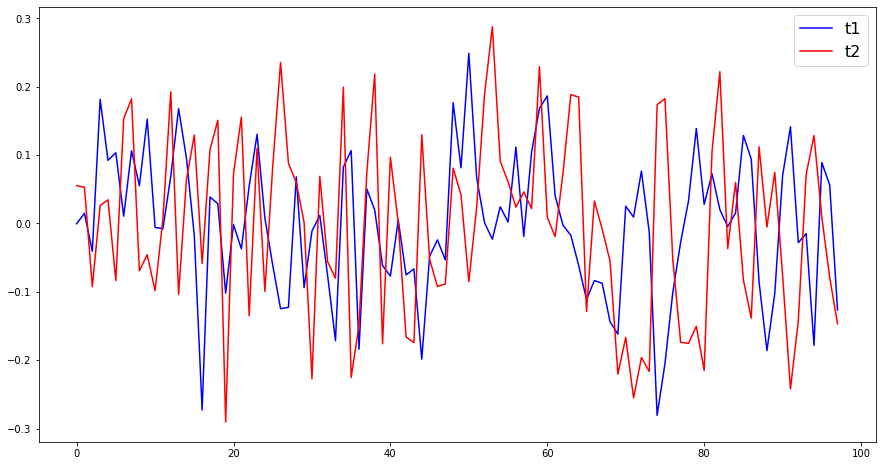

In [13]:
plt.figure(figsize=(15,8))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [14]:
gc_res = grangercausalitytests(ts_df,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7817  , p=0.3789  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.8066  , p=0.3691  , df=1
likelihood ratio test: chi2=0.8033  , p=0.3701  , df=1
parameter F test:         F=0.7817  , p=0.3789  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6872  , p=0.0735  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=5.6698  , p=0.0587  , df=2
likelihood ratio test: chi2=5.5087  , p=0.0637  , df=2
parameter F test:         F=2.6872  , p=0.0735  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=34.6727 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=112.2922, p=0.0000  , df=3
likelihood ratio test: chi2=74.1240 , p=0.0000  , df=3
parameter F test:         F=34.6727 , p=0.0000  , df_denom=88, df_num=3
